In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df=df.fillna('')

In [9]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [10]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [11]:
df=df.drop(['id', 'title', 'author'], axis=1)

In [12]:
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
from nltk.corpus import stopwords

In [14]:
from nltk.stem.porter import PorterStemmer

In [15]:
import re

In [16]:
port_stem=PorterStemmer()

In [17]:
port_stem

<PorterStemmer>

In [18]:
port_stem.stem("Hi thIs is chando * % %@@@")

'hi this is chando * % %@@@'

In [19]:
def stemming(content):
    con=re.sub('[^a-zA-Z]', ' ', content)
    con=con.lower()
    con=con.split()
    con=[port_stem.stem(word) for word in con if not word in stopwords.words('english')]
    con=' '.join(con)
    return con

In [20]:
stemming('Hi this is chando')

'hi chando'

In [21]:
df['text']= df['text'].apply(stemming)

In [22]:
x=df['text']

In [23]:
import pickle

In [24]:
pickle.dump(x, open('x_after_stemming.pkl', 'wb'))

In [25]:
load_x_after_stemming=pickle.load(open('x_after_stemming.pkl', 'rb'))

In [26]:
y=df['label']

In [27]:
y.shape

(20800,)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.20)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vect=TfidfVectorizer()

In [32]:
x_train=vect.fit_transform(x_train)
x_test=vect.transform(x_test)

In [33]:
x_test.shape

(4160, 97572)

# **Decision Tree**

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
modelTree=DecisionTreeClassifier()

In [80]:
modelTree.fit(x_train, y_train)

DecisionTreeClassifier()

In [81]:
prediction=modelTree.predict(x_test)

In [82]:
prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
modelTree.score(x_test, y_test)

0.8879807692307692

In [40]:
import pickle

In [41]:
pickle.dump(vect, open('vector.pkl', 'wb'))

In [42]:
pickle.dump(modelTree, open('modelTree.pkl', 'wb'))

In [43]:
vector_form=pickle.load(open('vector.pkl', 'rb'))

In [44]:
load_modelTree=pickle.load(open('modelTree.pkl', 'rb'))

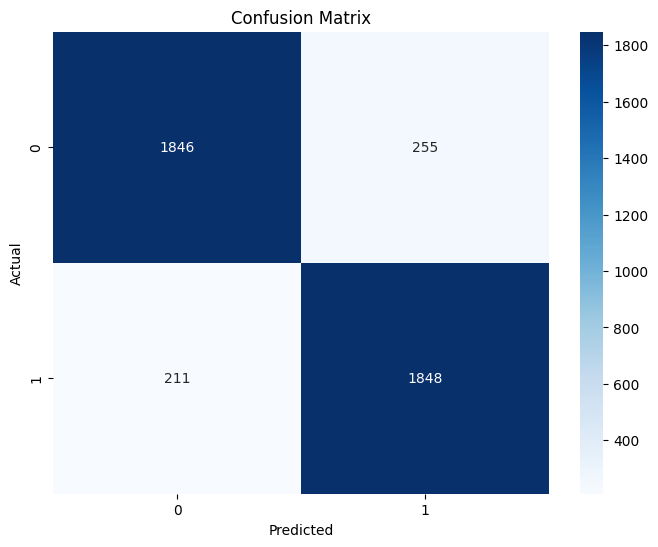

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Naive Bayes**

In [85]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)
prediction=NB_classifier.predict(x_test)
NB_classifier.score(x_test, y_test)

0.8846153846153846

In [47]:
pickle.dump(NB_classifier, open('NB_classifier.pkl', 'wb'))

In [48]:
load_NB_classifier=pickle.load(open('NB_classifier.pkl', 'rb'))

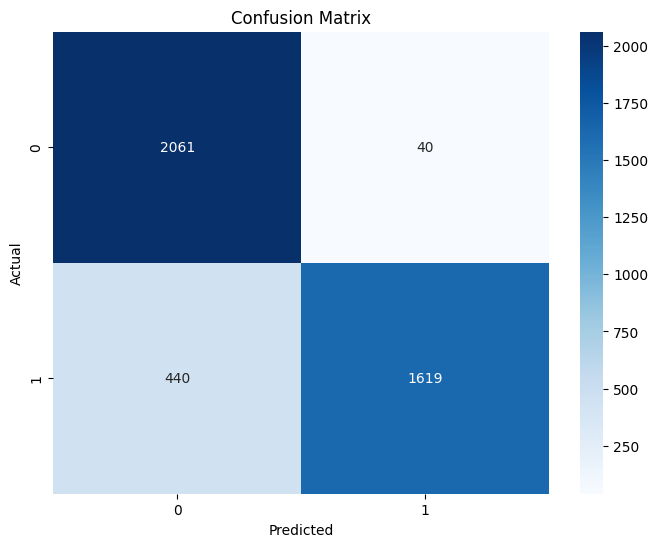

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Logistic regression**

In [87]:
from sklearn.linear_model import LogisticRegression
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(x_train, y_train)
prediction=LogisticRegression_model.predict(x_test)
LogisticRegression_model.score(x_test, y_test)

0.9490384615384615

In [50]:
pickle.dump(LogisticRegression_model, open('LogisticRegression_model.pkl', 'wb'))
load_LogisticRegression_model=pickle.load(open('LogisticRegression_model.pkl', 'rb'))

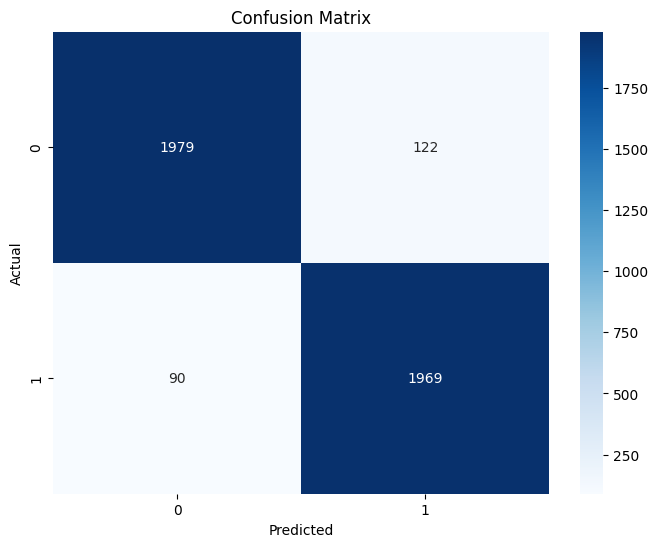

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Random Forest**

In [89]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier_model = RandomForestClassifier()
RandomForestClassifier_model.fit(x_train, y_train)
prediction=RandomForestClassifier_model.predict(x_test)
RandomForestClassifier_model.score(x_test, y_test)

0.9209134615384615

In [58]:
pickle.dump(RandomForestClassifier_model, open('RandomForestClassifier_model.pkl', 'wb'))
load_RandomForestClassifier_model=pickle.load(open('RandomForestClassifier_model.pkl', 'rb'))

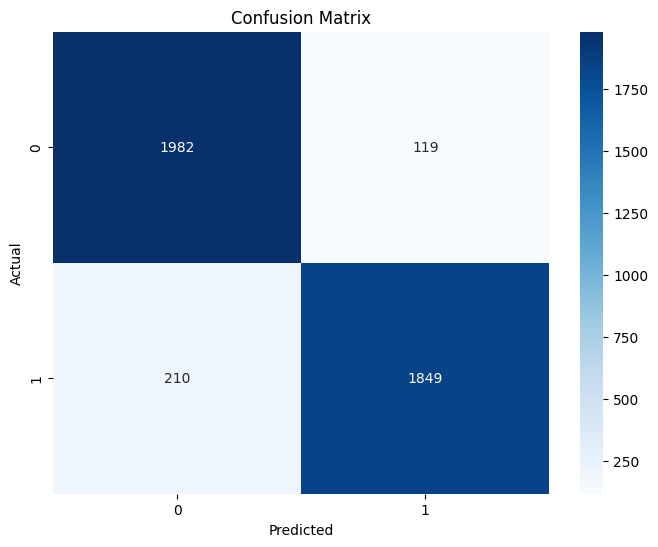

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **svm**

In [91]:
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
svm_model = clf
svm_model.fit(x_train, y_train)
prediction=svm_model.predict(x_test)
svm_model.score(x_test, y_test)

0.9620192307692308

In [62]:
pickle.dump(svm_model, open('svm_model.pkl', 'wb'))
load_svm_model=pickle.load(open('svm_model.pkl', 'rb'))

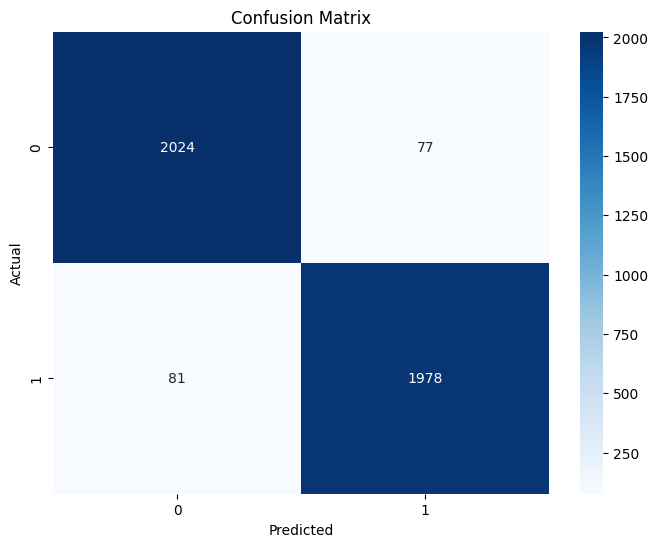

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [63]:
def fake_news(news):
    news=stemming(news)
    input_data=[news]
    vector_form1=vector_form.transform(input_data)
    Treeprediction = load_modelTree.predict(vector_form1)
    if Treeprediction == 0:
        Treeprediction = -1
    Treeprediction=Treeprediction*0.8865384615384615

    LogisticRegressionprediction = load_LogisticRegression_model.predict(vector_form1)
    if LogisticRegressionprediction <0.5:
        LogisticRegressionprediction = -1
    else:
        LogisticRegressionprediction = 1
    LogisticRegressionprediction=LogisticRegressionprediction*0.9490384615384615

    RandomForestClassifierprediction = load_RandomForestClassifier_model.predict(vector_form1)
    if RandomForestClassifierprediction == 0:
        RandomForestClassifierprediction = -1
    RandomForestClassifierprediction=RandomForestClassifierprediction*0.9204326923076923

    svm_modelprediction = load_svm_model.predict(vector_form1)
    if svm_modelprediction == 0:
        svm_modelprediction = -1
    svm_modelprediction=svm_modelprediction*0.9620192307692308

    prediction=Treeprediction+LogisticRegressionprediction+RandomForestClassifierprediction+svm_modelprediction
      
    return prediction

In [70]:
val=fake_news("""In these trying times, Jackie Mason is the Voice of Reason. [In this week’s exclusive clip for Breitbart News, Jackie discusses the looming threat of North Korea, and explains how President Donald Trump could win the support of the Hollywood left if the U. S. needs to strike first.  “If he decides to bomb them, the whole country will be behind him, because everybody will realize he had no choice and that was the only thing to do,” Jackie says. “Except the Hollywood left. They’ll get nauseous. ” “[Trump] could win the left over, they’ll fall in love with him in a minute. If he bombed them for a better reason,” Jackie explains. “Like if they have no transgender toilets. ” Jackie also says it’s no surprise that Hollywood celebrities didn’t support Trump’s strike on a Syrian airfield this month. “They were infuriated,” he says. “Because it might only save lives. That doesn’t mean anything to them. If it only saved the environment, or climate change! They’d be the happiest people in the world. ” Still, Jackie says he’s got nothing against Hollywood celebs. They’ve got a tough life in this country. Watch Jackie’s latest clip above.   Follow Daniel Nussbaum on Twitter: @dznussbaum """)

In [71]:
val

-3.718028846153846

In [72]:
if val<0:
    print('reliable')
else:
    print('unreliable')

reliable


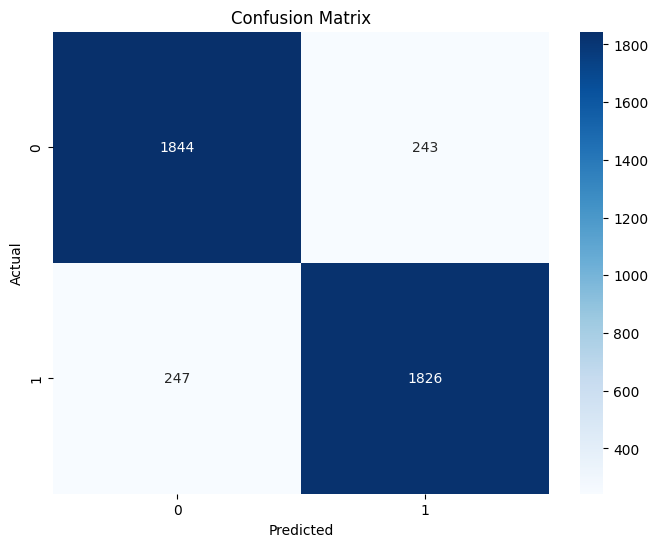

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()